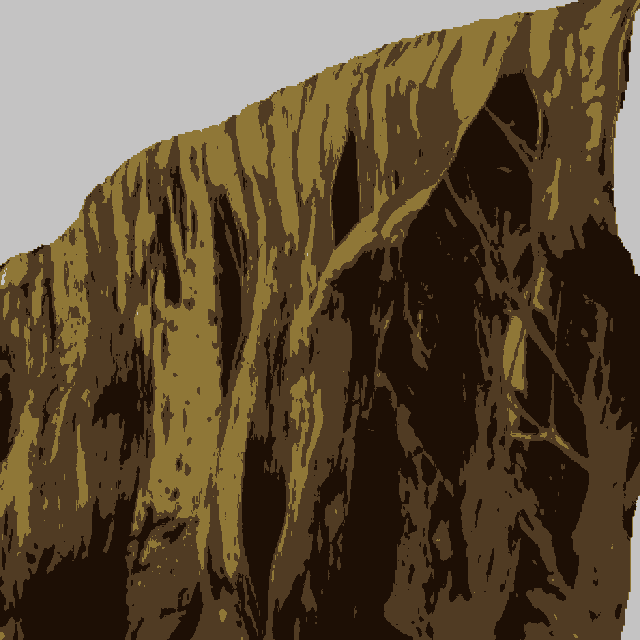

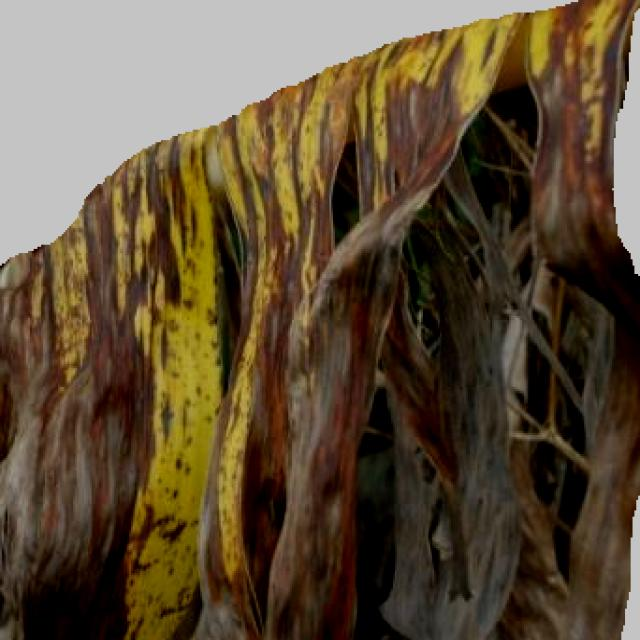

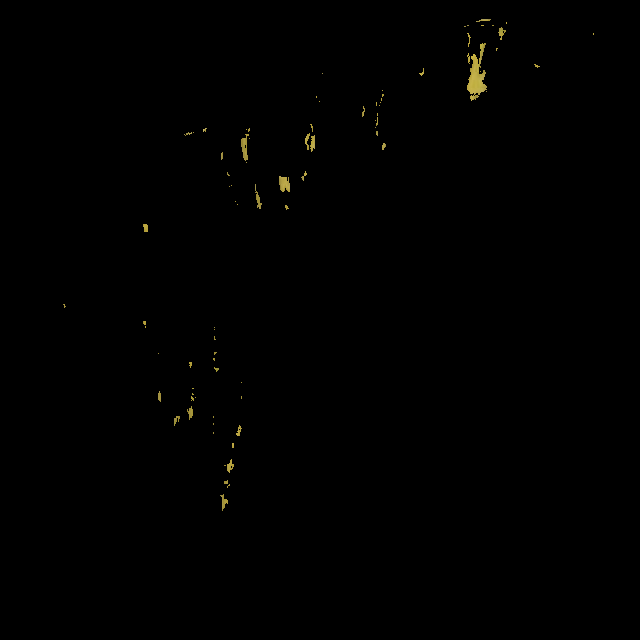

In [ ]:
# Install OpenCV
!pip install opencv-python-headless

# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read an image from the file system
img = cv2.imread("/IMG-20240325-WA0006.jpg")

# Reshape the image
Z = img.reshape((-1,3))

# Convert to np.float32
Z = np.float32(Z)

# Define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

# Display the clustered image
cv2_imshow(res2)
cv2.imwrite("clustered_image.jpg", res2)

# Take each frame
frame = cv2.imread("/IMG-20240325-WA0006.jpg")

# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Define range of blue color in HSV
lower_blue = np.array([25,120,150])
upper_blue = np.array([62,174,250])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

# Display the frame, mask, and resulting image
cv2_imshow(frame)
cv2_imshow(res)
cv2.imwrite("blue_mask.jpg", res)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 25 * 25, 128)  # Adjusted input size
        self.fc2 = nn.Linear(128, 2)  # Adjusted output size for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 25 * 25)  # Adjusted input size
        x = nn.functional.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Read an image from the file system
img = cv2.imread("/IMG-20240325-WA0006.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Preprocess the image
img = cv2.resize(img, (100, 100))  # Resize the image to a fixed size
img = img / 255.0  # Normalize pixel values to the range [0, 1]

# Create labels: 1 for blue images, 0 for non-blue images
# You need to manually prepare your dataset with labeled images
# For this example, let's assume the image is labeled as "blue"
label = 1

# Convert data to PyTorch tensors
# Convert data to PyTorch tensors
X_tensor = torch.tensor(img.transpose(2, 0, 1), dtype=torch.float32).unsqueeze(0)  # Add batch dimension
y_tensor = torch.tensor([[label]], dtype=torch.float32)  # Adjusted label tensor shape

# Initialize the model
model = SimpleCNN()

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    # Adjusted target tensor to match the size of the output tensor
    target = torch.tensor([[label]], dtype=torch.float32).expand_as(outputs)
    loss = criterion(outputs, target)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch + 1}/10], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    outputs = model(X_tensor)
    predicted = torch.round(outputs)
    accuracy = (predicted == y_tensor).sum().item() / len(y_tensor)
    print(f'Accuracy: {accuracy:.2f}')


Epoch [1/10], Loss: 0.7027
Epoch [2/10], Loss: 0.1954
Epoch [3/10], Loss: 0.0238
Epoch [4/10], Loss: 0.0015
Epoch [5/10], Loss: 0.0001
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000
Accuracy: 2.00


In [ ]:
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 25 * 25, 128)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 25 * 25)
        x = nn.functional.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Read an image from the file system
img = cv2.imread('/IMG-20240325-WA0006.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB


# Preprocess the image
img = cv2.resize(img, (100, 100))  # Resize the image to a fixed size
img = img / 255.0  # Normalize pixel values to the range [0, 1]

# Create a label: 1 for blue images
label = torch.tensor([[1.]]).float()  # Ensure the label has dimensions [1, 1]

# Convert the image to a PyTorch tensor
img_tensor = torch.tensor(img.transpose(2, 0, 1)).unsqueeze(0).float()

# Initialize the model
model = SimpleCNN()

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(img_tensor)
    loss = criterion(outputs, label)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch + 1}/10], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.7192
Epoch [2/10], Loss: 0.0419
Epoch [3/10], Loss: 0.0011
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0000
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000


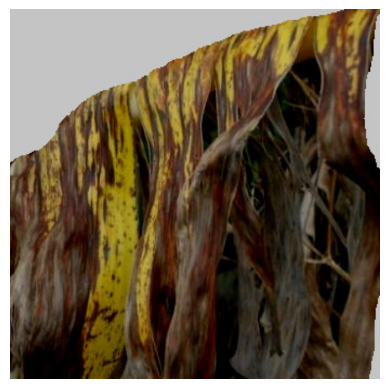

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Replace 'path/to/your/image.jpg' with the actual path to your image file
image_path = "/IMG-20240325-WA0006.jpg"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    print("Error: Unable to load the image.")
else:
    # Plot the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.axis('off')  # Turn off axis
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
